In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt

#import plotly.plotly as py
#import plotly.graph_objs as go

movie = pd.read_csv('movies.csv')
movie.set_index('movieId',inplace=True)

rating = pd.read_csv('ratings.csv')
rating.set_index('movieId',inplace=True)

link = pd.read_csv('links.csv',usecols = range(2))
link.set_index('movieId', inplace=True)

movie_ratings = pd.merge(movie,rating,on='movieId')

movie_ratings = pd.merge(movie_ratings,link,on='movieId')

overall_ratings = movie_ratings.groupby('movieId', as_index=True).rating.mean()
overall_ratings = overall_ratings.to_frame();

for_suggestion = movie_ratings.drop(labels=None, axis=0, index=None, columns={'userId','rating','timestamp'}, level=None, inplace=False, errors='raise')

userRatings = movie_ratings.pivot_table(index={'userId'}, columns={'title'}, values='rating')

corrMatrix = userRatings.corr(method='pearson', min_periods=50)


In [3]:
userID = int(input("Enter User ID :  "))

myRatings = userRatings.loc[userID].dropna()

to_be_dropped = myRatings.index

simCandidates = pd.Series()

for i in range(0, len(myRatings.index)):
    print("Adding sims for "+myRatings.index[i]+"...")
    #Retrieve similar movies to one that user rated 
    sims = corrMatrix[myRatings.index[i]].dropna()
    #In above line dropna is used 'cause we don't want to take movies with NaN values
    #Now scale its similarity by how well user rated this movie
    sims = sims.map(lambda x:x * myRatings[i])
    #Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Our RESULTS so far...
print("\n\nsorting...\n")
print("The movies suggested for you are ...\n")
simCandidates.sort_values(inplace=True, ascending=False)

#print(simCandidates[:10])
simCandidates
#print(simCandidates[-10:])

simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace=True, ascending=False)
suggested = pd.DataFrame({'title':simCandidates.index, 'rating':simCandidates.values})

suggested.set_index('title', inplace=True)
suggested = pd.merge(suggested,for_suggestion,on='title')
suggested.set_index('title',inplace=False)
suggested = suggested.drop_duplicates()
suggested = suggested.rename(columns={'rating':'similarity_factor'})
suggested.set_index('imdbId',inplace=True)

suggested.head(15)

Enter User ID :  11
Adding sims for 127 Hours (2010)...
Adding sims for Bank Job, The (2008)...
Adding sims for Bourne Identity, The (1988)...
Adding sims for Bowling for Columbine (2002)...
Adding sims for Citizen Kane (1941)...
Adding sims for D2: The Mighty Ducks (1994)...
Adding sims for Dark Knight Rises, The (2012)...
Adding sims for Departed, The (2006)...
Adding sims for Do the Right Thing (1989)...
Adding sims for Drive (2011)...
Adding sims for Exit Through the Gift Shop (2010)...
Adding sims for Free Willy 2: The Adventure Home (1995)...
Adding sims for From Dusk Till Dawn (1996)...
Adding sims for Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)...
Adding sims for Gravity (2013)...
Adding sims for Inception (2010)...
Adding sims for Informant!, The (2009)...
Adding sims for Inside Job (2010)...
Adding sims for Kingpin (1996)...
Adding sims for Last of the Mohicans, The (1992)...
Adding sims for Lethal Weapon 4 (1998)...
Adding sims for Life in a Day

,title,similarity_factor,genres
imdbId,,,
110912,Pulp Fiction (1994),10.325884,Comedy|Crime|Drama|Thriller
102926,"Silence of the Lambs, The (1991)",8.012074,Crime|Horror|Thriller
114814,"Usual Suspects, The (1995)",7.918020,Crime|Mystery|Thriller
111161,"Shawshank Redemption, The (1994)",7.486192,Crime|Drama
117951,Trainspotting (1996),7.259642,Comedy|Crime|Drama
137523,Fight Club (1999),7.110276,Action|Crime|Drama|Thriller
76759,Star Wars: Episode IV - A New Hope (1977),6.336974,Action|Adventure|Sci-Fi
33467,Citizen Kane (1941),6.237952,Drama|Mystery
407887,"Departed, The (2006)",6.196537,Crime|Drama|Thriller


In [8]:
#Below is a code for genre related search
genre = input("Enter genre to be searched  :  ")

genre_specific = movie[movie['genres'].str.contains(genre)]

genre_specific = pd.merge(genre_specific,link,on='movieId')
genre_specific = pd.merge(genre_specific,overall_ratings,on='movieId')

genre_specific = genre_specific.sort_values('rating', ascending=False)

genre_specific

Enter genre to be searched  :  Horror


,title,genres,imdbId,rating
movieId,,,,
3216,"Vampyros Lesbos (Vampiras, Las) (1971)",Fantasy|Horror|Thriller,66380,5.00
3837,Phantasm II (1988),Action|Fantasy|Horror|Sci-Fi|Thriller,95863,5.00
3757,Asylum (1972),Horror,68230,5.00
1771,Night Flier (1997),Horror,119784,5.00
4789,Phantom of the Paradise (1974),Comedy|Fantasy|Horror|Musical|Thriller,71994,5.00
1692,Alien Escape (1995),Horror|Sci-Fi,112318,5.00
7564,Kwaidan (Kaidan) (1964),Horror,58279,5.00
7208,Dr. Jekyll and Mr. Hyde (1941),Drama|Horror,33553,5.00
40226,Wild Zero (2000),Action|Comedy|Horror|Romance|Sci-Fi,267116,5.00


Text(0.5,1,' Analysis of Film Production over 1990 to 2016 ')

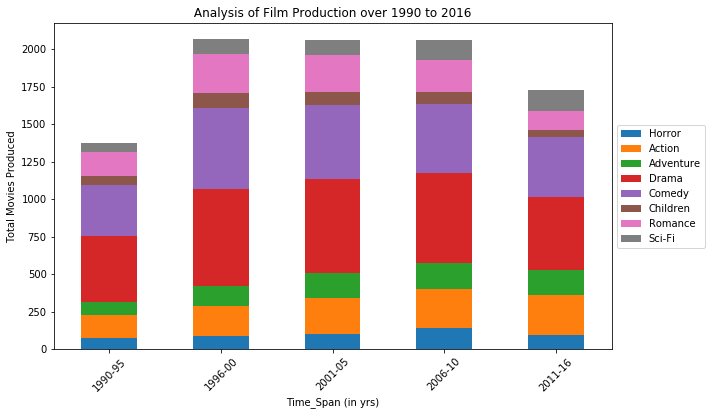

In [4]:
year_specific0 = movie[movie['title'].str.contains('1990')]
period = ['1991','1992','1993','1994']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]x`
    year_specific0 = year_specific0.append(cy)
        
#year_specific0

hrr0 = year_specific0[year_specific0['genres'].str.contains('Horror')]
act0 = year_specific0[year_specific0['genres'].str.contains('Action')]
adv0 = year_specific0[year_specific0['genres'].str.contains('Adventure')]
drm0 = year_specific0[year_specific0['genres'].str.contains('Drama')]
com0 = year_specific0[year_specific0['genres'].str.contains('Comedy')]
chl0 = year_specific0[year_specific0['genres'].str.contains('Children')]
rom0 = year_specific0[year_specific0['genres'].str.contains('Romance')]
scf0 = year_specific0[year_specific0['genres'].str.contains('Sci-Fi')]

year_specific1 = movie[movie['title'].str.contains('1996')]
period = ['1997','1998','1999','2000']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific1 = year_specific1.append(cy)
        
#year_specific1

hrr1 = year_specific1[year_specific1['genres'].str.contains('Horror')]
act1 = year_specific1[year_specific1['genres'].str.contains('Action')]
adv1 = year_specific1[year_specific1['genres'].str.contains('Adventure')]
drm1 = year_specific1[year_specific1['genres'].str.contains('Drama')]
com1 = year_specific1[year_specific1['genres'].str.contains('Comedy')]
chl1 = year_specific1[year_specific1['genres'].str.contains('Children')]
rom1 = year_specific1[year_specific1['genres'].str.contains('Romance')]
scf1 = year_specific1[year_specific1['genres'].str.contains('Sci-Fi')]

year_specific2 = movie[movie['title'].str.contains('2001')]
period = ['2002','2003','2004','2005']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific2 = year_specific2.append(cy)
        
#year_specific2

hrr2 = year_specific2[year_specific2['genres'].str.contains('Horror')]
act2 = year_specific2[year_specific2['genres'].str.contains('Action')]
adv2 = year_specific2[year_specific2['genres'].str.contains('Adventure')]
drm2 = year_specific2[year_specific2['genres'].str.contains('Drama')]
com2 = year_specific2[year_specific2['genres'].str.contains('Comedy')]
chl2 = year_specific2[year_specific2['genres'].str.contains('Children')]
rom2 = year_specific2[year_specific2['genres'].str.contains('Romance')]
scf2 = year_specific2[year_specific2['genres'].str.contains('Sci-Fi')]

year_specific3 = movie[movie['title'].str.contains('2006')]
period = ['2007','2008','2009','2010']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific3 = year_specific3.append(cy)
        
#year_specific3

hrr3 = year_specific3[year_specific3['genres'].str.contains('Horror')]
act3 = year_specific3[year_specific3['genres'].str.contains('Action')]
adv3 = year_specific3[year_specific3['genres'].str.contains('Adventure')]
drm3 = year_specific3[year_specific3['genres'].str.contains('Drama')]
com3 = year_specific3[year_specific3['genres'].str.contains('Comedy')]
chl3 = year_specific3[year_specific3['genres'].str.contains('Children')]
rom3 = year_specific3[year_specific3['genres'].str.contains('Romance')]
scf3 = year_specific3[year_specific3['genres'].str.contains('Sci-Fi')]

year_specific4 = movie[movie['title'].str.contains('2011')]
period = ['2012','2013','2014','2015','2016']

for ys in period:
    cy = movie[movie['title'].str.contains(ys)]
    year_specific4 = year_specific4.append(cy)
        
#year_specific4

hrr4 = year_specific4[year_specific4['genres'].str.contains('Horror')]
act4 = year_specific4[year_specific4['genres'].str.contains('Action')]
adv4 = year_specific4[year_specific4['genres'].str.contains('Adventure')]
drm4 = year_specific4[year_specific4['genres'].str.contains('Drama')]
com4 = year_specific4[year_specific4['genres'].str.contains('Comedy')]
chl4 = year_specific4[year_specific4['genres'].str.contains('Children')]
rom4 = year_specific4[year_specific4['genres'].str.contains('Romance')]
scf4 = year_specific4[year_specific4['genres'].str.contains('Sci-Fi')]

d1 = {'Year_Span':['1990 to 1995','1996 to 2000','2001 to 2005','2006 to 2010','2011 to 2016'],'Horror':[len(hrr0),len(hrr1),len(hrr2),len(hrr3),len(hrr4)],'Action':[len(act0),len(act1),len(act2),len(act3),len(act4)],'Adventure':[len(adv0),len(adv1),len(adv2),len(adv3),len(adv4)],'Drama':[len(drm0),len(drm1),len(drm2),len(drm3),len(drm4)],'Comedy':[len(com0),len(com1),len(com2),len(com3),len(com4)],'Children':[len(chl0),len(chl1),len(chl2),len(chl3),len(chl4)],'Romance':[len(rom0),len(rom1),len(rom2),len(rom3),len(rom4)],'Sci-Fi':[len(scf0),len(scf1),len(scf2),len(scf3),len(scf4)]}

dfyrs = pd.DataFrame(data=d1)

mygraph = dfyrs.plot(kind='bar',stacked=True, legend=True, figsize=(10,6))
mygraph.set_xlabel("Time_Span (in yrs)")
mygraph.set_ylabel("Total Movies Produced")
mygraph.legend(loc='center left', bbox_to_anchor=(1,0.5))
mygraph.set_xticklabels(['1990-95','1996-00','2001-05','2006-10','2011-16'], rotation=45)
mygraph.set_title(" Analysis of Film Production over 1990 to 2016 ")

Text(0.5,1,' Agewise Analysis of Films Watched ')

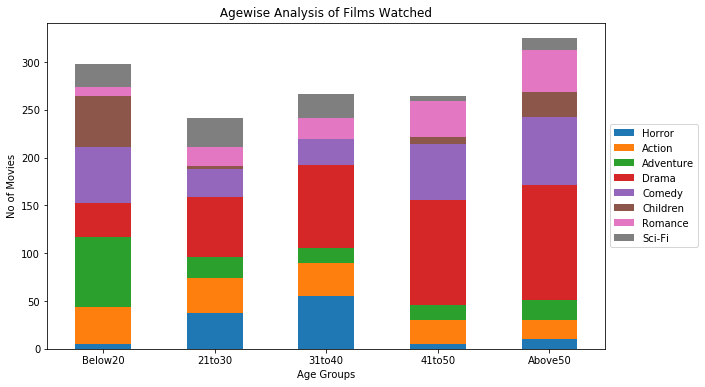

In [4]:
#BELOW IS CODE FOR SECOND GRAPH

ageuser = pd.read_csv("ageusers.csv", usecols=range(0,3))
ageuser.set_index('movieId')
ageuser.dropna()
ageuser = pd.merge(ageuser,link,on='movieId')
ageuser = pd.merge(ageuser,movie,on='movieId')
ageuser = ageuser.set_index('movieId')
#ageuser

agebelow20 = ageuser[ageuser.age<=20]

hrr_age0 = agebelow20[agebelow20['genres'].str.contains('Horror')]
act_age0 = agebelow20[agebelow20['genres'].str.contains('Action')]
adv_age0 = agebelow20[agebelow20['genres'].str.contains('Adventure')]
drm_age0 = agebelow20[agebelow20['genres'].str.contains('Drama')]
com_age0 = agebelow20[agebelow20['genres'].str.contains('Comedy')]
chl_age0 = agebelow20[agebelow20['genres'].str.contains('Children')]
rom_age0 = agebelow20[agebelow20['genres'].str.contains('Romance')]
scf_age0 = agebelow20[agebelow20['genres'].str.contains('Sci-Fi')]

age21to30 = ageuser[ageuser.age==21]
period = [22,23,24,25,26,27,28,29,30]

for a in period:
    ca = ageuser[ageuser.age==a]
    age21to30 = age21to30.append(ca)

hrr_age1 = age21to30[age21to30['genres'].str.contains('Horror')]
act_age1 = age21to30[age21to30['genres'].str.contains('Action')]
adv_age1 = age21to30[age21to30['genres'].str.contains('Adventure')]
drm_age1 = age21to30[age21to30['genres'].str.contains('Drama')]
com_age1 = age21to30[age21to30['genres'].str.contains('Comedy')]
chl_age1 = age21to30[age21to30['genres'].str.contains('Children')]
rom_age1 = age21to30[age21to30['genres'].str.contains('Romance')]
scf_age1 = age21to30[age21to30['genres'].str.contains('Sci-Fi')]

age31to40 = ageuser[ageuser.age==31]
period = [32,33,34,35,36,37,38,39,40]

for a in period:
    ca = ageuser[ageuser.age==a]
    age31to40 = age31to40.append(ca)

hrr_age2 = age31to40[age31to40['genres'].str.contains('Horror')]
act_age2 = age31to40[age31to40['genres'].str.contains('Action')]
adv_age2 = age31to40[age31to40['genres'].str.contains('Adventure')]
drm_age2 = age31to40[age31to40['genres'].str.contains('Drama')]
com_age2 = age31to40[age31to40['genres'].str.contains('Comedy')]
chl_age2 = age31to40[age31to40['genres'].str.contains('Children')]
rom_age2 = age31to40[age31to40['genres'].str.contains('Romance')]
scf_age2 = age31to40[age31to40['genres'].str.contains('Sci-Fi')]

age41to50 = ageuser[ageuser.age==41]
period = [42,43,44,45,46,47,48,49,50]

for a in period:
    ca = ageuser[ageuser.age==a]
    age41to50 = age41to50.append(ca)

hrr_age3 = age41to50[age41to50['genres'].str.contains('Horror')]
act_age3 = age41to50[age41to50['genres'].str.contains('Action')]
adv_age3 = age41to50[age41to50['genres'].str.contains('Adventure')]
drm_age3 = age41to50[age41to50['genres'].str.contains('Drama')]
com_age3 = age41to50[age41to50['genres'].str.contains('Comedy')]
chl_age3 = age41to50[age41to50['genres'].str.contains('Children')]
rom_age3 = age41to50[age41to50['genres'].str.contains('Romance')]
scf_age3 = age41to50[age41to50['genres'].str.contains('Sci-Fi')]

ageabove50 = ageuser[ageuser.age>=50]

hrr_age4 = ageabove50[ageabove50['genres'].str.contains('Horror')]
act_age4 = ageabove50[ageabove50['genres'].str.contains('Action')]
adv_age4 = ageabove50[ageabove50['genres'].str.contains('Adventure')]
drm_age4 = ageabove50[ageabove50['genres'].str.contains('Drama')]
com_age4 = ageabove50[ageabove50['genres'].str.contains('Comedy')]
chl_age4 = ageabove50[ageabove50['genres'].str.contains('Children')]
rom_age4 = ageabove50[ageabove50['genres'].str.contains('Romance')]
scf_age4 = ageabove50[ageabove50['genres'].str.contains('Sci-Fi')]

d2 = {'age_groups':['agebelow20','age21to30','age31to40','age41to50','ageabove50'],'Horror':[len(hrr_age0),len(hrr_age1),len(hrr_age2),len(hrr_age3),len(hrr_age4)],'Action':[len(act_age0),len(act_age1),len(act_age2),len(act_age3),len(act_age4)],'Adventure':[len(adv_age0),len(adv_age1),len(adv_age2),len(adv_age3),len(adv_age4)],'Drama':[len(drm_age0),len(drm_age1),len(drm_age2),len(drm_age3),len(drm_age4)],'Comedy':[len(com_age0),len(com_age1),len(com_age2),len(com_age3),len(com_age4)],'Children':[len(chl_age0),len(chl_age1),len(chl_age2),len(chl_age3),len(chl_age4)],'Romance':[len(rom_age0),len(rom_age1),len(rom_age2),len(rom_age3),len(rom_age4)],'Sci-Fi':[len(scf_age0),len(scf_age1),len(scf_age2),len(scf_age3),len(scf_age4)]}

dfags = pd.DataFrame(data=d2)
dfags

scndgraph = dfags.plot(kind='bar',stacked=True, legend=True, figsize=(10,6))
scndgraph.set_xlabel("Age Groups")
scndgraph.set_ylabel("No of Movies")
scndgraph.legend(loc='center left', bbox_to_anchor=(1,0.5))
scndgraph.set_xticklabels(['Below20','21to30','31to40','41to50','Above50'], rotation=0)
scndgraph.set_title(" Agewise Analysis of Films Watched ")

In [3]:
c = 'me'
print("you : "+c)

you : me


In [52]:
########################################################################

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [40]:
x = pd.get_dummies(suggested, drop_first=True)
x

,similarity_factor,title_2001: A Space Odyssey (1968),title_Ace Ventura: Pet Detective (1994),title_Ace Ventura: When Nature Calls (1995),title_Addams Family Values (1993),title_Airplane! (1980),title_Aladdin (1992),title_Alien (1979),title_Aliens (1986),title_Almost Famous (2000),...,genres_Drama|Sci-Fi|Thriller,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Horror,genres_Horror|Sci-Fi,genres_Musical|Romance,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Thriller
imdbId,,,,,,,,,,,,,,,,,,,,,
110912,10.325884,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102926,8.012074,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114814,7.918020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111161,7.486192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117951,7.259642,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137523,7.110276,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76759,6.336974,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33467,6.237952,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407887,6.196537,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
x_train,x_test = train_test_split(x,test_size=0.1, random_state=0)
x_train

,similarity_factor,title_2001: A Space Odyssey (1968),title_Ace Ventura: Pet Detective (1994),title_Ace Ventura: When Nature Calls (1995),title_Addams Family Values (1993),title_Airplane! (1980),title_Aladdin (1992),title_Alien (1979),title_Aliens (1986),title_Almost Famous (2000),...,genres_Drama|Sci-Fi|Thriller,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Horror,genres_Horror|Sci-Fi,genres_Musical|Romance,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Thriller
imdbId,,,,,,,,,,,,,,,,,,,,,
499549,1.595676,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99653,0.903438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264464,2.034111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118655,2.087097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181875,2.576483,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
241527,-0.605647,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108358,0.477051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103064,0.266836,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316654,0.279048,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([3, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 3, 4, 3, 0, 0, 2, 3, 3, 4,
       0, 3, 0, 0, 3, 1, 4, 0, 3, 4, 0, 2, 3, 3, 3, 2, 2, 0, 3, 3, 3, 3,
       4, 3, 0, 3, 2, 3, 0, 0, 3, 2, 3, 0, 0, 0, 4, 0, 3, 4, 3, 2, 0, 0,
       3, 3, 1, 3, 2, 2, 2, 2, 4, 0, 0, 3, 0, 2, 4, 3, 0, 0, 1, 3, 4, 4,
       0, 3, 2, 2, 0, 3, 2, 4, 0, 0, 2, 0, 2, 2, 1, 0, 3, 3, 3, 4, 3, 2,
       2, 4, 2, 0, 3, 2, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 2, 3, 1, 3, 3, 0, 2, 2, 2, 3, 0, 3, 4, 0, 3, 2, 3, 3, 0, 0, 4,
       2, 2, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 4, 3, 3, 2, 2, 3, 2, 1, 3, 0,
       3, 2, 3, 3, 0, 4, 2, 3, 2, 3, 0, 3, 2, 4, 3, 3, 0, 3, 3, 0, 4, 0,
       3, 3, 0, 0, 4, 3, 3, 0, 3, 4, 3, 0, 3, 2, 0, 3, 2, 0, 0, 0, 3, 3,
       0, 2, 2, 4, 3, 2, 0, 3, 0, 2, 0, 3, 2, 2, 0, 0, 4, 0, 0, 0, 3, 2,
       3], dtype=int32)

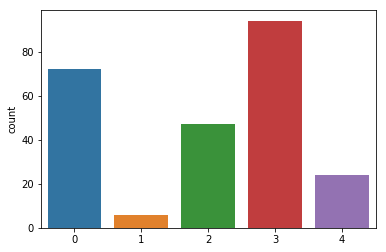

In [44]:
sns.countplot(kmeans.labels_)

In [71]:
print(kmeans.labels_)

[3 3 3 3 2 0 0 0 0 3 3 0 3 3 4 3 0 0 2 3 3 4 0 3 0 0 3 1 4 0 3 4 0 2 3 3 3
 2 2 0 3 3 3 3 4 3 0 3 2 3 0 0 3 2 3 0 0 0 4 0 3 4 3 2 0 0 3 3 1 3 2 2 2 2
 4 0 0 3 0 2 4 3 0 0 1 3 4 4 0 3 2 2 0 3 2 4 0 0 2 0 2 2 1 0 3 3 3 4 3 2 2
 4 2 0 3 2 3 3 3 0 3 2 0 3 3 3 3 3 0 3 0 3 3 2 3 1 3 3 0 2 2 2 3 0 3 4 0 3
 2 3 3 0 0 4 2 2 3 3 3 0 0 0 0 3 0 0 4 3 3 2 2 3 2 1 3 0 3 2 3 3 0 4 2 3 2
 3 0 3 2 4 3 3 0 3 3 0 4 0 3 3 0 0 4 3 3 0 3 4 3 0 3 2 0 3 2 0 0 0 3 3 0 2
 2 4 3 2 0 3 0 2 0 3 2 2 0 0 4 0 0 0 3 2 3]


{3: 'a'}

In [62]:
for item in clusters:
    print("Cluster ", item)
    for i in clusters[item]:
        print(i)

In [21]:
x_train.head()

,similarity_factor,title_2001: A Space Odyssey (1968),title_Ace Ventura: Pet Detective (1994),title_Ace Ventura: When Nature Calls (1995),title_Addams Family Values (1993),title_Airplane! (1980),title_Aladdin (1992),title_Alien (1979),title_Aliens (1986),title_Almost Famous (2000),...,genres_Drama|Sci-Fi|Thriller,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Horror,genres_Horror|Sci-Fi,genres_Musical|Romance,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Thriller
imdbId,,,,,,,,,,,,,,,,,,,,,
499549,1.595676,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99653,0.903438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264464,2.034111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118655,2.087097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181875,2.576483,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x_test

,similarity_factor,title_2001: A Space Odyssey (1968),title_Ace Ventura: Pet Detective (1994),title_Ace Ventura: When Nature Calls (1995),title_Addams Family Values (1993),title_Airplane! (1980),title_Aladdin (1992),title_Alien (1979),title_Aliens (1986),title_Almost Famous (2000),...,genres_Drama|Sci-Fi|Thriller,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Horror,genres_Horror|Sci-Fi,genres_Musical|Romance,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Thriller
imdbId,,,,,,,,,,,,,,,,,,,,,
246578,2.868575,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110413,1.611827,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109831,1.391236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120815,0.883375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99088,-0.252799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111280,0.726102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91763,1.460535,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
172495,1.036749,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116996,-0.412794,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
cluster_map = pd.DataFrame()
cluster_map = x_train.copy()
cluster_map['cluster'] = kmeans.labels_

In [29]:
cluster_map.head()

,similarity_factor,title_2001: A Space Odyssey (1968),title_Ace Ventura: Pet Detective (1994),title_Ace Ventura: When Nature Calls (1995),title_Addams Family Values (1993),title_Airplane! (1980),title_Aladdin (1992),title_Alien (1979),title_Aliens (1986),title_Almost Famous (2000),...,genres_Drama|Thriller,genres_Drama|Thriller|War,genres_Drama|War,genres_Horror,genres_Horror|Sci-Fi,genres_Musical|Romance,genres_Mystery|Sci-Fi|Thriller,genres_Mystery|Thriller,genres_Thriller,cluster
imdbId,,,,,,,,,,,,,,,,,,,,,
499549,1.595676,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99653,0.903438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
264464,2.034111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
118655,2.087097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
181875,2.576483,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4


In [30]:
UserRequire = kmeans.predict(x_test)
UserRequire

array([4, 7, 1, 5, 3, 5, 1, 1, 3, 8, 3, 1, 7, 7, 6, 1, 2, 5, 2, 3, 1, 2,
       6, 4, 3, 4, 5], dtype=int32)

In [34]:
movie_ratings.loc[cluster_map[cluster_map.cluster == UserRequire[9]].index].dropna()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,title,genres,userId,rating,timestamp,imdbId
movieId,,,,,,
34583,Prime Cut (1972),Action|Crime|Drama,468.0,3.0,1.296200e+09,69121.0


In [36]:
suggested.loc[34583]

title                Casablanca (1942)
similarity_factor              5.22473
genres                   Drama|Romance
Name: 34583, dtype: object